In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.2.1+cu121


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## Introduction to Tensors

### Creating tensors  

In [ ]:
# scalar
scalar = torch.tensor(7)
scalar

tensor(7)

# Dimension/rank of a tensor
## Shortcut: No. of sq. brackets
 -

In [ ]:
scalar.ndim

0

In [ ]:
scalar.item()

7

In [ ]:
# Vector
vector = torch.tensor([7,7])
vector

tensor([7, 7])

In [ ]:
vector.ndim

1

In [ ]:
vector.shape

torch.Size([2])

In [ ]:
# MATRIX
MATRIX = torch.tensor([[7,8],
                       [9,10],[11,12]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10],
        [11, 12]])

In [ ]:
MATRIX.ndim

2

In [ ]:
MATRIX[2]

tensor([11, 12])

In [ ]:
MATRIX.shape

torch.Size([3, 2])

In [ ]:
# TENSOR
TENSOR = torch.tensor([[[1,2,3],
                        [3,6,9],
                        [2,4,5]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [ ]:
TENSOR.ndim

3

In [ ]:
TENSOR.shape

torch.Size([1, 3, 3])

In [ ]:
TENSOR[0]

tensor([[1, 2, 3],
        [3, 6, 9],
        [2, 4, 5]])

In [ ]:
TENSOR2 = torch.tensor([[[1,2],
                         [3,4],
                         [5,6],
                         [7,8]]])

In [ ]:
TENSOR2.ndim

3

In [ ]:
TENSOR2.shape

torch.Size([1, 4, 2])

In [ ]:
TENSOR2[0]

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])

In [ ]:
TENSOR2[0][2]

tensor([5, 6])

As shown in the below image, we can see that, the dimension of a tensor can be seen as the number of square brackets in the beginning or the ending. So, in the below example, the dimension of the tensor is 3. The first square bracket indicates the **0th dimension**, thereby referencing the whole tensor. The second square bracket indicates the **1st dimension**, it can be seen as the number of rows. The third square bracket signifies the **2nd dimension**, it can be seen as the number of elements in each row.

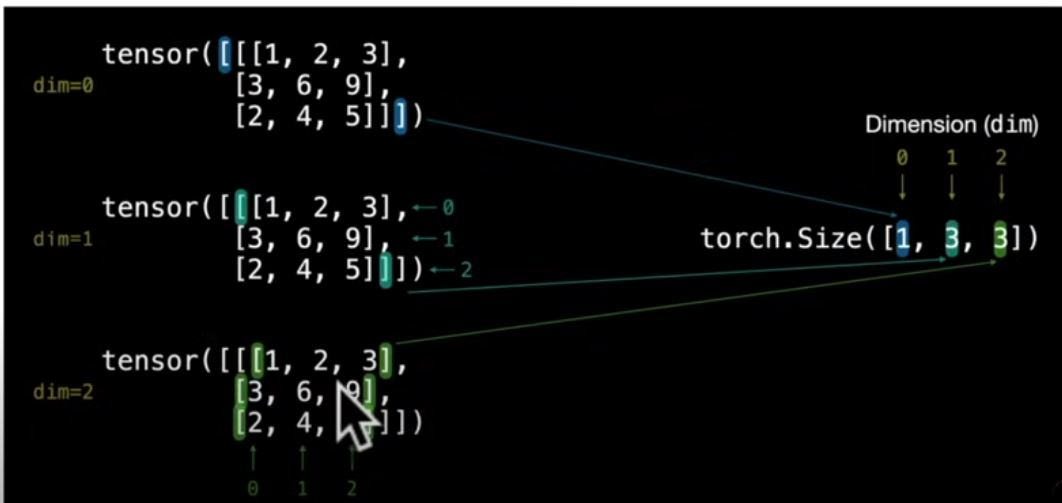

### Random Tensors

Why random tensors?

Random tensors are important because many NNs start with tensors full of random numbers and adjust those random numbers to better represent the data

Start with random numbers -> look at data -> update random numbers -> look at data -> update

In [ ]:
# Create a random tensor of size (3,4)
random_tensor = torch.rand(1,3,4)
random_tensor

tensor([[[0.5975, 0.0851, 0.0167, 0.6541],
         [0.8566, 0.2057, 0.9556, 0.1084],
         [0.2899, 0.4629, 0.9568, 0.7125]]])

In [ ]:
random_tensor.ndim

3

In [ ]:
random_tensor2 = torch.rand(3,4)
random_tensor2

tensor([[0.5714, 0.0271, 0.3216, 0.9198],
        [0.3579, 0.4094, 0.4175, 0.0575],
        [0.2471, 0.9271, 0.2535, 0.3487]])

In [ ]:
random_tensor2.ndim, random_tensor2.shape


(2, torch.Size([3, 4]))

In [ ]:
# Create a random tensor with similar shape to an image tensor
random_image_size_tensor = torch.rand(size=(224,224,3)) #  height, width,colour channels(R,G,B)
random_image_size_tensor.shape,random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

In [ ]:
# taking a small subsample of the original random image tensor
# to understand the tensor dimensions a little better

random_subsample = random_image_size_tensor[0:5,0:5,:]
print(random_subsample)
random_subsample.ndim, random_subsample.shape

tensor([[[0.0735, 0.7279, 0.7034],
         [0.6339, 0.3254, 0.4065],
         [0.4715, 0.1693, 0.3842],
         [0.1037, 0.9614, 0.6319],
         [0.8724, 0.7497, 0.6526]],

        [[0.1046, 0.5040, 0.3920],
         [0.0699, 0.5127, 0.6104],
         [0.2407, 0.1289, 0.3666],
         [0.4753, 0.6695, 0.6567],
         [0.2166, 0.6832, 0.9941]],

        [[0.7666, 0.0553, 0.4965],
         [0.0957, 0.8241, 0.3016],
         [0.5705, 0.4676, 0.0747],
         [0.5897, 0.4418, 0.3280],
         [0.1902, 0.1965, 0.5920]],

        [[0.9347, 0.3343, 0.0542],
         [0.5345, 0.1634, 0.4203],
         [0.8292, 0.5481, 0.2511],
         [0.8605, 0.4395, 0.5629],
         [0.0050, 0.6635, 0.6797]],

        [[0.5864, 0.2536, 0.4754],
         [0.7343, 0.9297, 0.9423],
         [0.0089, 0.3623, 0.6539],
         [0.8979, 0.9702, 0.2609],
         [0.5696, 0.9757, 0.9067]]])


(3, torch.Size([5, 5, 3]))

In [ ]:
random_subsample[0]

tensor([[0.0735, 0.7279, 0.7034],
        [0.6339, 0.3254, 0.4065],
        [0.4715, 0.1693, 0.3842],
        [0.1037, 0.9614, 0.6319],
        [0.8724, 0.7497, 0.6526]])

This random_subsample[0] gave us the first tensor with **5 rows of three valued matrix** as shown in the figure. Similarly there are 5 matrices of this kind within the whole tensor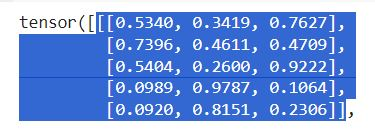

By the same logic, the above random_image_tensor code creates 224x3 values (224 rows of 3 valued vectors), 224 times

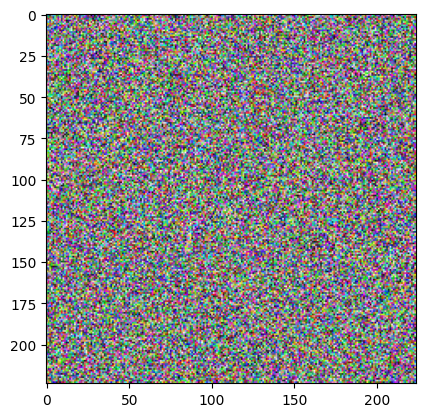

In [ ]:
plt.imshow(random_image_size_tensor)

### Zeros and ones

In [ ]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3,4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
# Create a tensor of all ones
ones = torch.ones(size=(3,4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
ones.dtype

torch.float32

### Creating a range of Tensors and tensors-like

In [ ]:
# Use torch.range() and if deprecated use torch.arange
one_to_ten = torch.arange(start=1, end=11, step = 1)
one_to_ten



tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
one_to_ten_odd = torch.arange(start=1, end=11,step=2)
one_to_ten_odd

tensor([1, 3, 5, 7, 9])

In [ ]:
# Create tensors like
ten_zeros = torch.zeros_like(input=one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor datatypes

**Note:** Tensor datatypes are the common cause for the three big errors we'll run into with pytorch and deep learning

1. Tensors not right datatype
2. Tensors not right shape
3. Tensors not on the right device

In [ ]:
# Float 32 tensor
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # What data type is the tensor - eg:float32 or float 16 - most oftenly used
                               device=None, # What device is your tensor on
                               requires_grad=False) # whether or not to track gradients with this tensor's operations
float_32_tensor

tensor([3., 6., 9.])

In [ ]:
float_32_tensor.dtype

torch.float32

We have obtained the above result as float 32 datatype although we have decided that the dtype is None because the default datatype of tensors is **float32**

In [ ]:
float_16_tensor = torch.tensor([3.0,6.0,9.0],
                               dtype=torch.float16)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

Most common types of datatypes that we mostly use are float32 (32 bit floating point) or float16 (16 bit floating point). These datatypes represent the precision of the data that we are using to represent a quantity

We can also convert a float32 tensor into a float16 tensor using many techniques. One of the important techniques is the following one.

In [ ]:
float_16_tensor2 = float_32_tensor.type(torch.float16)
float_16_tensor2

tensor([3., 6., 9.], dtype=torch.float16)

In [ ]:
float_tensors_product = float_16_tensor * float_32_tensor
float_tensors_product, float_tensors_product.dtype

(tensor([ 9., 36., 81.]), torch.float32)

In [ ]:
int_32_tensor = torch.tensor([3,6,9],dtype=torch.int32)
int_16_tensor = int_32_tensor.type(torch.int16)

int_32_tensor, int_16_tensor

(tensor([3, 6, 9], dtype=torch.int32), tensor([3, 6, 9], dtype=torch.int16))

In [ ]:
int_tensors_product = int_32_tensor * int_16_tensor

int_tensors_product

tensor([ 9, 36, 81], dtype=torch.int32)

In [ ]:
int_float_tensors_prodcut = int_32_tensor * float_32_tensor

int_float_tensors_prodcut, int_float_tensors_prodcut.dtype

(tensor([ 9., 36., 81.]), torch.float32)

In [ ]:
int_64_tensor = torch.tensor([3,6,9],dtype=torch.long) # long ->one more notation to define a int64 tensor
int_64_tensor, int_64_tensor.dtype

(tensor([3, 6, 9]), torch.int64)

**Observing the tensors attributes like datatype, shape and which device are the tensors on**

In [ ]:
some_tensor = torch.rand(3,4,dtype=torch.float16)
some_tensor

tensor([[0.0557, 0.2314, 0.8545, 0.3101],
        [0.3574, 0.9048, 0.6284, 0.9580],
        [0.5649, 0.0737, 0.1841, 0.5464]], dtype=torch.float16)

In [ ]:
print(some_tensor)
print(f"Datatype of the tensor: {some_tensor.dtype}")
print(f"Shape of the tensor: {some_tensor.shape}")
print(f"Device on which the tensor is on: {some_tensor.device}")

tensor([[0.0557, 0.2314, 0.8545, 0.3101],
        [0.3574, 0.9048, 0.6284, 0.9580],
        [0.5649, 0.0737, 0.1841, 0.5464]], dtype=torch.float16)
Datatype of the tensor: torch.float16
Shape of the tensor: torch.Size([3, 4])
Device on which the tensor is on: cpu


### Manipulating Tensors (tensor operations)

Tensor operations include:
* Addition
* Subtraction
* Multiplication (element-wise)
* Division
* Matrix multiplication

In [ ]:
# Create a tensor and add 10 to it
tensor = torch.tensor([1,2,3])
tensor+10

tensor([11, 12, 13])

In [ ]:
# Multiply a tensor by 10
tensor * 10

tensor([10, 20, 30])

In [ ]:
# Subtract 10 from the tensor
tensor - 10

tensor([-9, -8, -7])

In [ ]:
# Try out pytorch in-built functins
torch.mul(tensor,10)

tensor([10, 20, 30])

In [ ]:
torch.add(tensor,10)

tensor([11, 12, 13])

In [ ]:
torch.subtract(tensor,10)

tensor([-9, -8, -7])

### Matrix multiplication

Two ways of multiplications with matrices in neural networks and deep learning

1. Element-wise
2. Matrix multiplication

Matrix multiplications require two rules to be satisfied:
1. The **inner dimensions** must match (columns of first matrix and the rows of the second matrix)

2. The resulting matrix has the shape of the **outer dimensions**


In [ ]:
# Element-wise multiplication

print (tensor,"*", tensor)
print(f"Equals: {tensor * tensor}")

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


In [ ]:
# Matrix multiplication
torch.matmul(tensor,tensor)

tensor(14)

In [ ]:
tensor.shape

torch.Size([3])

In [ ]:
tensor2 = torch.rand(3,2)
tensor3 = torch.rand(3,2)

tensor2.shape, tensor3.shape

(torch.Size([3, 2]), torch.Size([3, 2]))

In [ ]:
tensor2, tensor3


(tensor([[0.2819, 0.9487],
         [0.6204, 0.2700],
         [0.3991, 0.2312]]),
 tensor([[0.3850, 0.8966],
         [0.7814, 0.6808],
         [0.8259, 0.5096]]))

In [ ]:
#torch.matmul(tensor2,tensor3) #doesn't work as inner dimensions don't match
torch.mm(tensor2,tensor3.T) # mm is same as matmul
# In the above line we have transposed the tensor3 and then applied mm

tensor([[0.9591, 0.8661, 0.7163],
        [0.4810, 0.6686, 0.6500],
        [0.3609, 0.4692, 0.4474]])

## Finding the min, max, mean, sum etc (tensor aggregation)



In [ ]:
# Create a tensor
x = torch.arange(0,100,10)
x, x.dtype

(tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]), torch.int64)

In [ ]:
# Find the min
torch.min(x),x.min()

(tensor(0), tensor(0))

In [ ]:
#Find the max
torch.max(x),x.max()

(tensor(90), tensor(90))

In [ ]:
#torch.mean(x) -> Gives us an error as mean expects floating point of complex datatype
# However, we can see that the dtype of x is Long or int64 in other words
torch.mean(x.type(torch.float32)),x.type(torch.float32).mean()

(tensor(45.), tensor(45.))

In [ ]:
# Find the sum
torch.sum(x),x.sum()

(tensor(450), tensor(450))

## Finding the positional min and max

 -> at what index does the min or max value exist


In [ ]:
min_index = x.argmin() # We have the minimum value at index 0
min_index

tensor(0)

In [ ]:
max_index = x.argmax() # We have the maximum value at index 9
max_index

# Especially useful when we are writing a softmax classifier

tensor(9)

In [ ]:
x[min_index],x[max_index] # Which are min and max values

(tensor(0), tensor(90))

## Reshaping, stacking, squeezing and unsqueezing tensors

* Reshaping - reshapes an input tensor to a defined shape
* View - Return a view of an input tensor of certain shape, but keeps the same memory as the original tensor
* Stacking - combine or concatenate multiple tensors on top of each other(vstack) or side by side(hstack)
* Squeze - removes all `1` dimensions from a tensor
* Unsqueeze - add a `1` dimension to the target tensor
* Permute - Return a view of the input with dimensions permuted (swapped) in a certain way



In [ ]:
import torch
x = torch.arange(1.,10.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [ ]:
# Add an extra dimension
x_reshaped = x.reshape(1,9)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
x_reshaped2 = x.reshape(3,3)
x_reshaped2, x_reshaped2.shape

(tensor([[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]),
 torch.Size([3, 3]))

**We have to make sure that the reshaping size has to be compatible with the original size**

## View

View of a tensor shares the same memory as the original input

So, changing z changes x

In [ ]:
# Change the view
z = x.view(1,9)
z,z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
z[:,0] = 5
z,x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [ ]:
# Stack tensors on top of each other
# dim=0 results in vertical stack and dim=1 -> horiz stack
# Stack expects the tensors to be of same size
x_stacked = torch.stack([x,x,x,x], dim=1)
x_stacked

tensor([[5., 5., 5., 5.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.],
        [8., 8., 8., 8.],
        [9., 9., 9., 9.]])

In [ ]:
x_horiz_stack = torch.hstack([x,x,x])
x_horiz_stack

tensor([5., 2., 3., 4., 5., 6., 7., 8., 9., 5., 2., 3., 4., 5., 6., 7., 8., 9.,
        5., 2., 3., 4., 5., 6., 7., 8., 9.])

In [ ]:
x_vert_stack = torch.vstack([x,x,x])
x_vert_stack

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [ ]:
# Squeeze and unsqueeze

# Creating a random tensors a and b
a = torch.rand(1,3,2)
b = torch.rand(2,3,2)
c = torch.rand(1,2,2)
a,b,c

(tensor([[[0.4799, 0.4904],
          [0.3418, 0.1944],
          [0.1130, 0.5902]]]),
 tensor([[[0.0215, 0.0574],
          [0.1860, 0.2595],
          [0.4783, 0.1118]],
 
         [[0.7987, 0.7691],
          [0.2696, 0.0910],
          [0.7987, 0.9658]]]),
 tensor([[[0.1989, 0.3002],
          [0.9043, 0.9875]]]))

**HSTACK:** For, horizontally stacking the tensors, all the dimensions other than the first dimension(dim=1 -> Rows) must match. This can vary because horizontal stacking can just be viewed as one row on top of other row

In [ ]:
stacked_ac = torch.hstack([a,c])
stacked_ac

tensor([[[0.4799, 0.4904],
         [0.3418, 0.1944],
         [0.1130, 0.5902],
         [0.1989, 0.3002],
         [0.9043, 0.9875]]])

**VSTACK:** For, vertically stacking the tensors, all the dimensions other than the zeroeth dimension(dim=0 -> no of rowed and columned tensors) must match.

In [ ]:
stacked_ab = torch.vstack([a,b])
stacked_ab

tensor([[[0.4799, 0.4904],
         [0.3418, 0.1944],
         [0.1130, 0.5902]],

        [[0.0215, 0.0574],
         [0.1860, 0.2595],
         [0.4783, 0.1118]],

        [[0.7987, 0.7691],
         [0.2696, 0.0910],
         [0.7987, 0.9658]]])

In [ ]:
a.shape,b.shape,c.shape,stacked_ab.shape,stacked_ac.shape

(torch.Size([1, 3, 2]),
 torch.Size([2, 3, 2]),
 torch.Size([1, 2, 2]),
 torch.Size([3, 3, 2]),
 torch.Size([1, 5, 2]))

**Squeeze** removes all the dimensions with value equal to 1 i.e, single dimensions

**unsqueeze** add a single dimension at the given position

In [ ]:
(a.squeeze()).shape, (b.unsqueeze(dim=2)).shape

(torch.Size([3, 2]), torch.Size([2, 3, 1, 2]))

In [ ]:
(b.unsqueeze(dim=2)).squeeze().shape

torch.Size([2, 3, 2])

**torch.permute:**

* torch.permute rearranges the dimensions of a target tensor in a specified order

* it returns a "view" of the input tensor

In [ ]:
ex = torch.randn(2,3,5)
ex.shape

torch.Size([2, 3, 5])

In [ ]:
torch.permute(ex,(2, 0, 1)).shape

torch.Size([5, 2, 3])

One of the common places, **permute** is used is with image tensors

In [ ]:
x_original = torch.rand(size=(224,224,3)) # [height, width, colour_channels]

# Permute the original tensor to rearrange the axis (or dim) order
x_permuted = torch.permute(x_original,(2,0,1))

x_original.shape, x_permuted.shape


(torch.Size([224, 224, 3]), torch.Size([3, 224, 224]))

In [ ]:
x_original[0,0,0]=10365

In [ ]:
x_permuted[0,0,0]

tensor(10365.)

## Indexing (selecting data from tensors)

Indexing with PyTorch is similar to indexing with NumPy

In [ ]:
# Create a tensor
import torch
x = torch.arange(1,10).reshape(1,3,3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [ ]:
# Let's index on our new tensor
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
# Let's index on the middle bracket (dim=1)
x[0,0], x[0][0]

(tensor([1, 2, 3]), tensor([1, 2, 3]))

In [ ]:
# Let's index on the most inner bracket (last dimension
x[0][0][0], x[0,0,0]

(tensor(1), tensor(1))

In [ ]:
# You can use ":" to select all of a target dimension
x[:,0]

tensor([[1, 2, 3]])

In [ ]:
# Get all the values of 0th and 1st dimensions, but only index 1 of 2nd dimension
x[:,:,1]

tensor([[2, 5, 8]])

In [ ]:
# Get all the values of 0th dimension, but only the 1 index value of 1st and 2nd dimension
x[:,1,1], x[0,1,1]
# Note the square bracket when we are using a ":", we get output tensor of all the values in index 0

(tensor([5]), tensor(5))

In [ ]:
# Get the index 0 of 0th and 1st dimension and all the values of 2nd dimension
x[0,0,:]

tensor([1, 2, 3])

# PyTorch tensors & NumPy

Numpy is a popular scientific Python numerical computing library.

And because of this, PyTorch has functionality to interact with it.

* Data in Numpy, to PyTorch tensor -> `torch.from_numpy(ndarray)`
* PyTorch tensor -> NumPy -> torch.Tensor.numpy()


In [ ]:
# NumPy array to tensor

import torch
import numpy as np

array = np.arange(1.0,8.0)
tensor = torch.from_numpy(array) # So, add .type(torch.float32) to change the datatype to float32
array,tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [ ]:
array.dtype, tensor.dtype

(dtype('float64'), torch.float64)

In [ ]:
torch.arange(1.0,8.0).dtype

torch.float32

**Warning:**
Therefore, if we create a tensor directly from torch, we get a float32 as default datatype.

But, if we create an array in NumPy and convert it into a tensor using the above method, the default datatype would be float64

In [ ]:
# Change the value of the array, what will this do to the `tensor`?
array = array + 1
array, tensor

# So, changing array does not change the value of the tensor

(array([3., 4., 5., 6., 7., 8., 9.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [ ]:
# Tensor to NumPy array
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [ ]:
# Change the tensor, and what happens to the `numpy_tensor`?
tensor = tensor + 1
tensor, numpy_tensor

# So, they don't share memory, they don't effect each other

(tensor([3., 3., 3., 3., 3., 3., 3.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## Reproducibility (trying to take random out of random)

In short how a neural network learns:

`start with random numbers -> tensor operations -> update random numbers
 to try and make them better representations of data -> again -> again `

 To reduce the randomness in neural networks and PyTorch comes the concept of
  **random seed**

  Essentially waht the random seed does is "flavour" the randomness.

In [ ]:
import torch

# Create two random tensors
random_tensor_A = torch.rand(3,4)
random_tensor_B = torch.rand(3,4)

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.7651, 0.4781, 0.0776, 0.1884],
        [0.4878, 0.4997, 0.1970, 0.9027],
        [0.7481, 0.1729, 0.5762, 0.0406]])
tensor([[0.0071, 0.7164, 0.4770, 0.9136],
        [0.3786, 0.3870, 0.9952, 0.0488],
        [0.1111, 0.7562, 0.9696, 0.7905]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [ ]:
# Let's make some random, but, reproducible tensors
import torch

# Set the random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3,4)

torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3,4)
print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)

# Every time, we use a rand() function, we have to adjust the flavour
# So, we have to keep the torch.manual_seed(RANDOM_SEED) before using rand()

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


## Running tensors and PyTorch objects on the GPUs (and making faster computations)


# 1. Getting a GPU

1. Easiest - Use Google COlab for a free GPU (options to upgrade as well)
2. Using own GPU
3. Use cloud computing - GCP, AWS, Azure, these services allow you to rent computers on ClassFoundException



In [ ]:
!nvidia-smi

Sun Apr 14 21:11:43 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8              13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

2. Check for GPU access with PyTorch

In [ ]:
import torch
torch.cuda.is_available()

True